In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing world happeniess file

In [17]:
happscoredf = pd.read_csv("Happeniess_Score_Dataset.csv")
happscoredf.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [18]:
happscoredf.shape

(158, 12)

In [19]:
happscoredf.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [21]:
happscoredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [22]:
# Now checking the missing value in DataSet
happscoredf.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

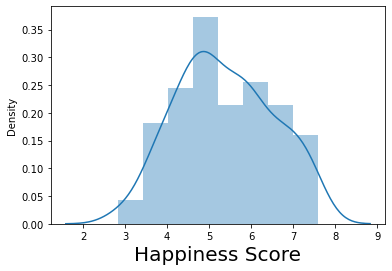

In [24]:
sns.distplot(happscoredf['Happiness Score'])
plt.xlabel('Happiness Score',fontsize = 20)
plt.show()

# Happiness score chart is showing it is a continuous data so it is a Regression problem.

In [25]:
# Now we have to find correlation

Hapsco_correlation = happscoredf.corr()

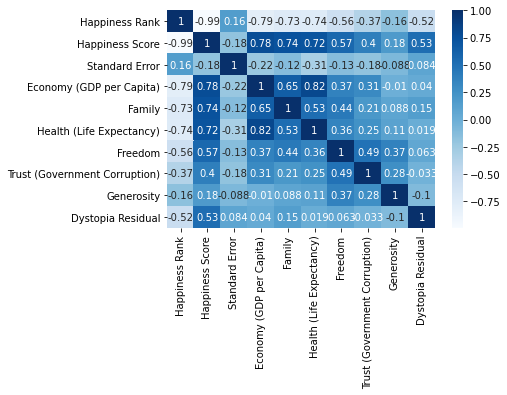

In [28]:
plt.figure
sns.heatmap(Hapsco_correlation, cmap = 'Blues',annot = True)
plt.show()

# From the heatmap it is clearly showing Happiness Rank has a negative relation with Happiness Score.

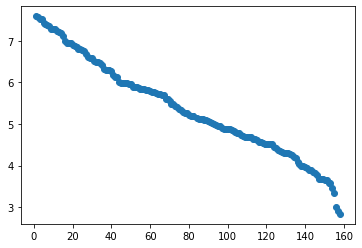

In [29]:
plt.scatter(happscoredf["Happiness Rank"], happscoredf["Happiness Score"])

In [31]:
# Dropping columns County & Region 

happscoredf.drop(["Country","Region"], axis=1,inplace = True)

In [32]:
happscoredf.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [33]:
# Dropping Happiness Rank column because it is very high negative relation with Happiness Score

happscoredf.drop(["Happiness Rank"], axis = 1, inplace = True)

In [34]:
happscoredf.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


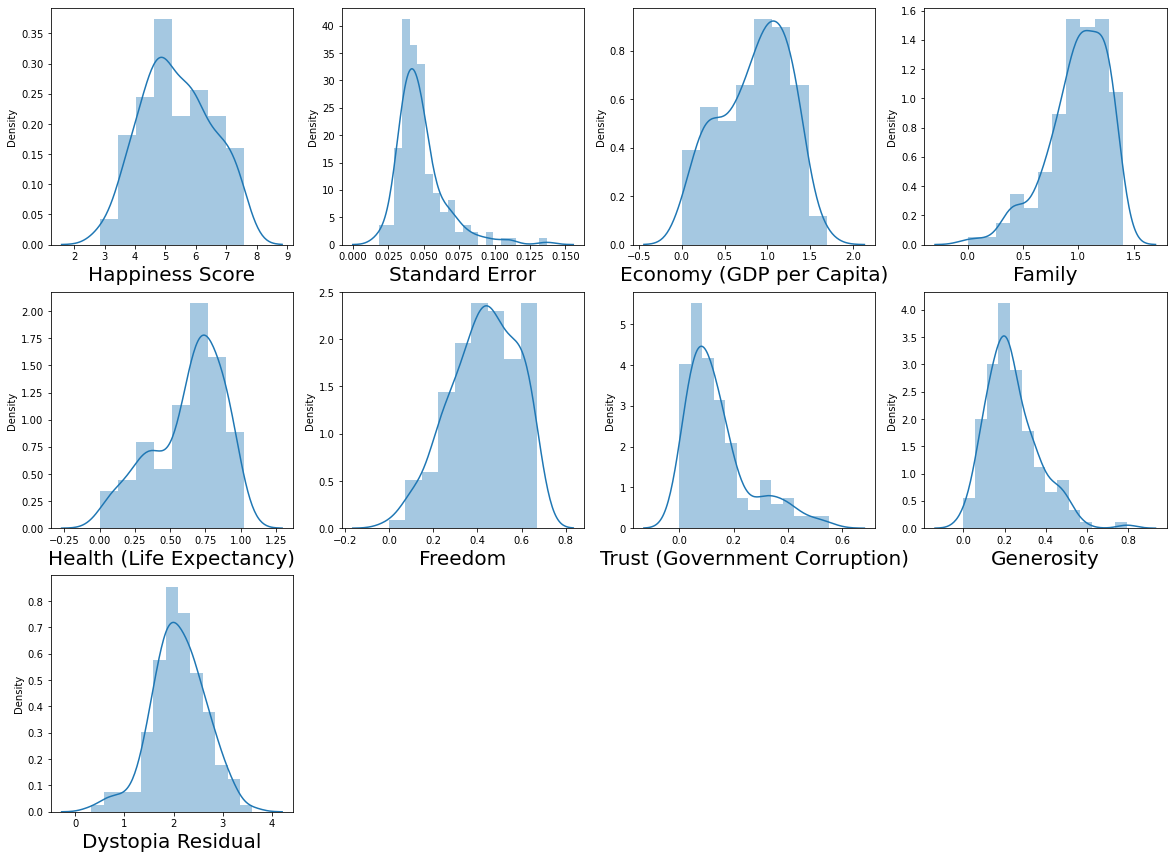

In [38]:
# To check how data is distributed for every column

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in happscoredf:
    if plotnumber <=10:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(happscoredf[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# Checking Outliers

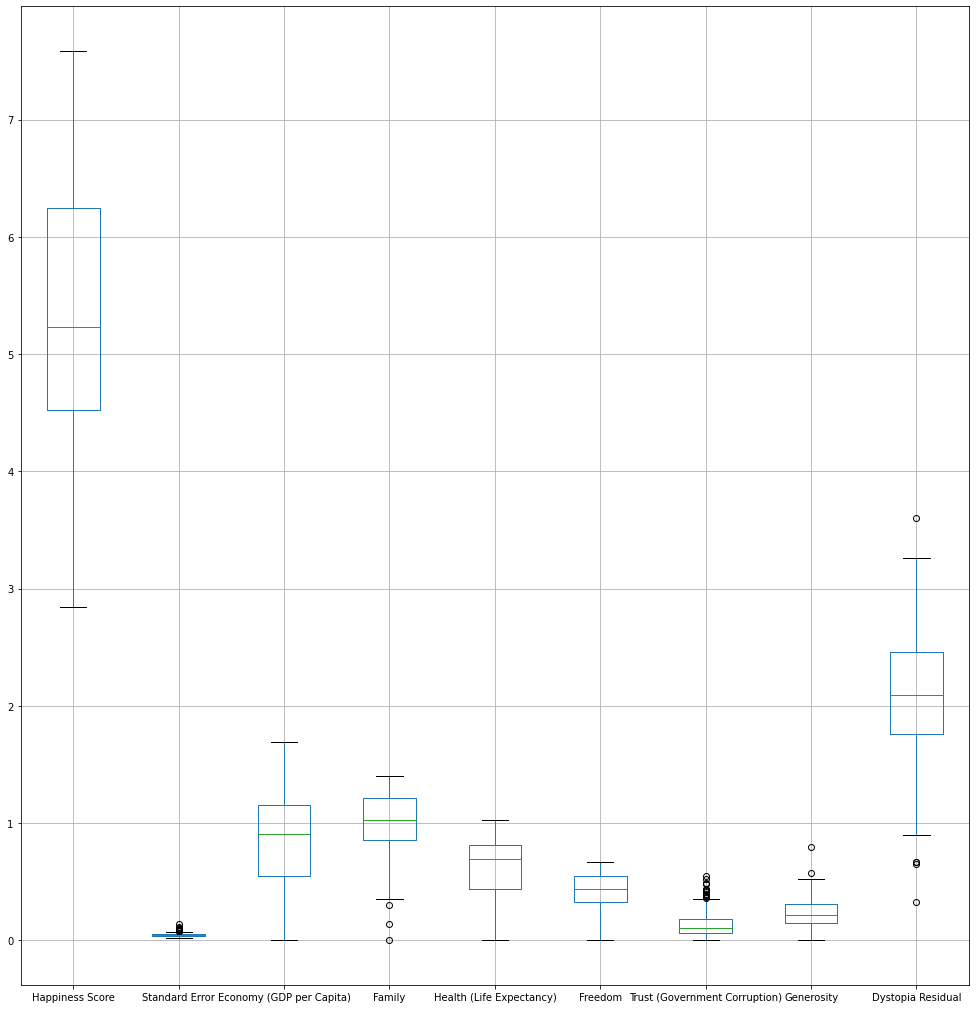

In [40]:
happscoredf.boxplot(figsize=[17,18])
plt.show()

# Standard Error, Family, Trust, Generosity, Dystopia have outliers

In [41]:
# Checking the skewness

happscoredf.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [51]:
features = happscoredf[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']]

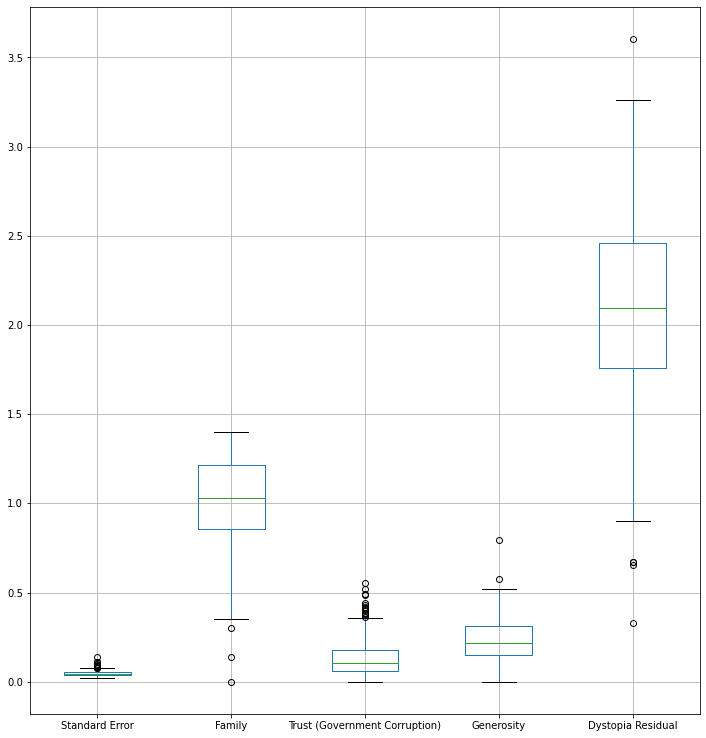

In [52]:
features.boxplot(figsize=[12,13])
plt.show()

# Removing outliers using IQR method

In [53]:
df = happscoredf.copy()

In [56]:
feat = ['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']

In [58]:
# Find all the outliers in the column using IQR

indexdrop = np.array([])
for col in df[feat]:
    q1 = features[col].quantile(0.25)
    q3 = features[col].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    colm = features[col]
    index = colm[(colm > upperval) | (colm < lowerval)].index
    indexdrop = np.append(indexdrop, index)

In [59]:
indexdrop

array([ 39.,  40.,  62.,  64.,  93.,  96., 100., 115., 125., 156., 147.,
       152., 157.,   0.,   2.,   3.,   5.,   7.,   8.,  16.,  19.,  23.,
        27.,  71.,  90., 129., 153.,  33., 128.,  13.,  71., 131., 153.,
       155.])

In [60]:
df = df.drop(indexdrop)

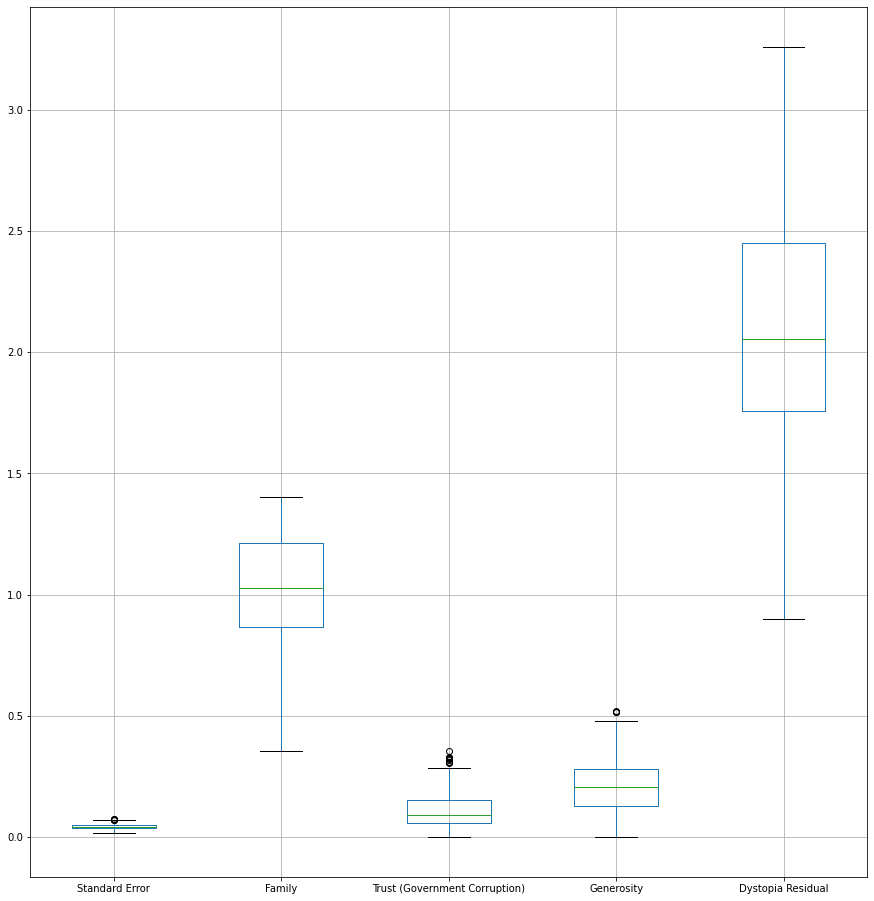

In [61]:
df[feat].boxplot(figsize = [15,16])
plt.show()

In [63]:
df.shape

(126, 9)

In [65]:
happscoredf.shape

(158, 9)

In [66]:
# checking percentage of data loss

loss = (158-126)/158*100
loss

20.253164556962027

# We have deleted 20% of data and it is not acceptable for any data set

# Using Z Score

In [68]:
df2 = happscoredf.copy()

In [69]:
from scipy.stats import zscore
zscor = zscore(df2) 
z_score_abs = np.abs(zscor) 

df3 = df2[(z_score_abs <3).all(axis=1)]

In [70]:
df3.shape

(149, 9)

In [71]:
df2.shape

(158, 9)

In [73]:
# checking data loss percentage

loss = (158-149)/158*100
loss

5.69620253164557

# 5.6% of data loss can accptable

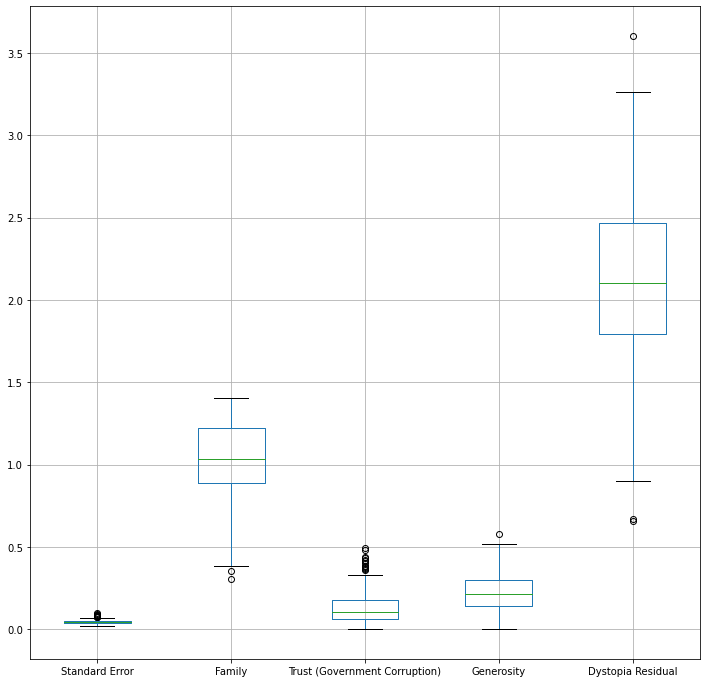

In [75]:
df3[feat].boxplot(figsize=[12,12])
plt.show()

# some outliers are removed

In [76]:
happscoredf = df3.copy()

In [77]:
happscoredf.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

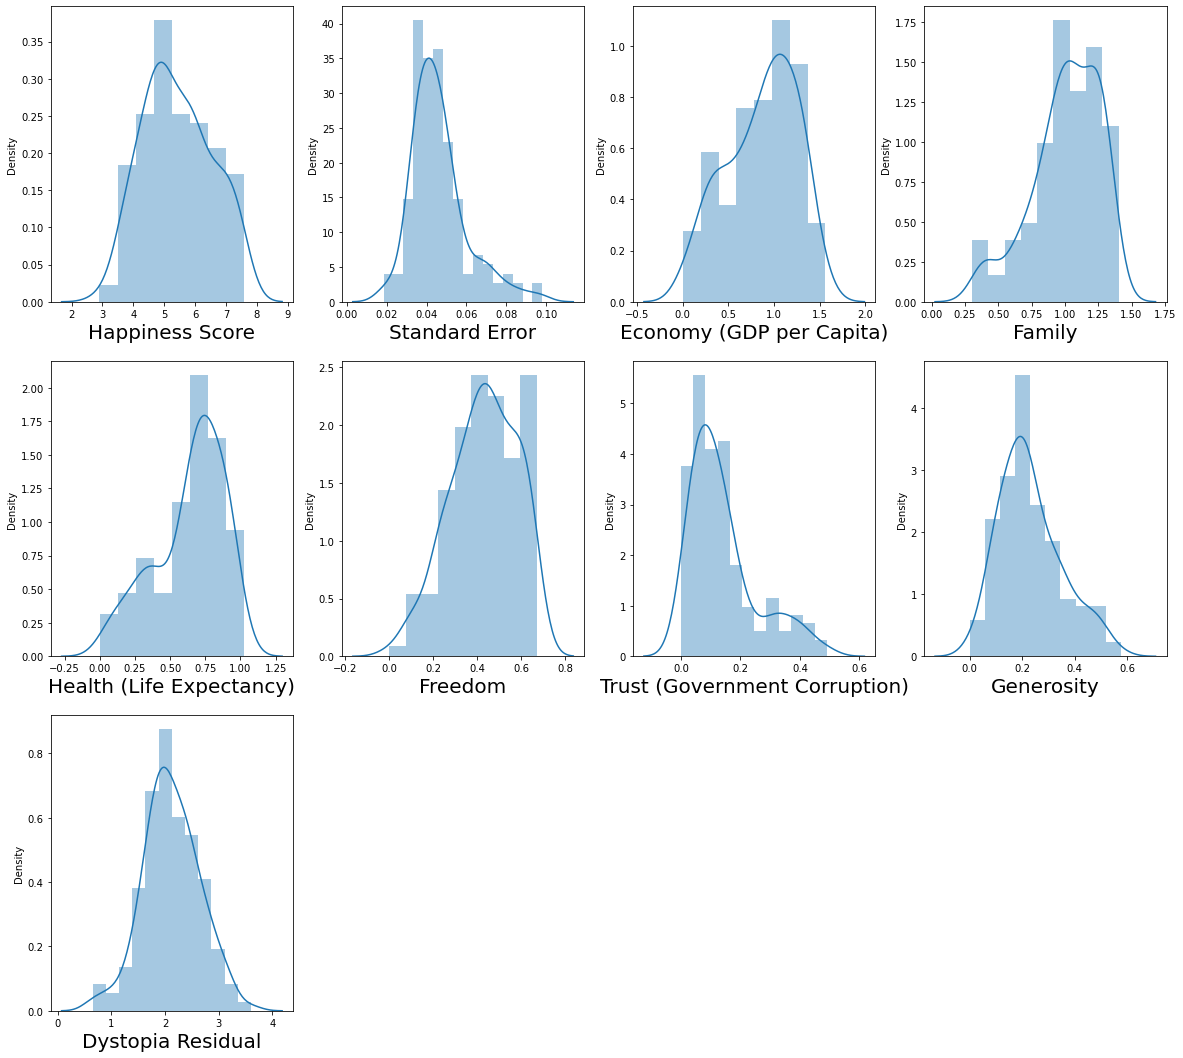

In [78]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnum = 1

for col in happscoredf:
    if plotnum <=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(happscoredf[col])
        plt.xlabel(col,fontsize=20)
    plotnum +=1
plt.show()

# after removing outliers Skewness some reduced

# Normalizing the distribution

In [80]:
# replacing 0 value with their respective column median using simple imputer

from sklearn.impute import SimpleImputer 

In [81]:
(happscoredf ==0).sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         1
Family                           0
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [83]:
SI = SimpleImputer(missing_values = 0, strategy = 'median', verbose = 0)

In [84]:
feature = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']

In [85]:
SI = SI.fit(happscoredf[feature])

In [86]:
happscoredf[feature] = SI.transform(happscoredf[feature])

In [87]:
(happscoredf ==0).sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [88]:
happscoredf.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.381261
Family                          -0.811340
Health (Life Expectancy)        -0.732954
Freedom                         -0.327105
Trust (Government Corruption)    1.284999
Generosity                       0.694540
Dystopia Residual               -0.021144
dtype: float64

In [89]:
skewd = ['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']

# Normalizing data distribution using log transformer

In [90]:
logtr = happscoredf.copy()

In [91]:
for col in logtr[skewd]:
    logtr[col]= np.log(logtr[col])

In [92]:
logtr.skew()

Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.381261
Family                          -1.611713
Health (Life Expectancy)        -1.982557
Freedom                         -0.327105
Trust (Government Corruption)   -0.852804
Generosity                      -2.502847
Dystopia Residual               -0.021144
dtype: float64

# Normalizing data distribution using Pwer Transformer

In [93]:
from sklearn.preprocessing import PowerTransformer

In [94]:
powtrns = PowerTransformer(method = 'yeo-johnson', standardize = True)

In [95]:
df4 = happscoredf[skewd]

In [96]:
transformed = powtrns.fit_transform(df4)

In [97]:
# convert numpy array back into dataset
transformed = pd.DataFrame(transformed, columns = df4.columns)

In [99]:
transformed.isnull().sum()

Standard Error                   0
Family                           0
Health (Life Expectancy)         0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [100]:
transformed.skew()

Standard Error                  -0.031216
Family                          -0.148528
Health (Life Expectancy)        -0.182912
Trust (Government Corruption)    0.179009
Generosity                       0.033375
dtype: float64

In [101]:
transformed.index = happscoredf.index

In [102]:
happscoredf[skewd] = transformed[skewd]

In [103]:
happscoredf.skew()

Happiness Score                  0.169740
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.381261
Family                          -0.148528
Health (Life Expectancy)        -0.182912
Freedom                         -0.327105
Trust (Government Corruption)    0.179009
Generosity                       0.033375
Dystopia Residual               -0.021144
dtype: float64

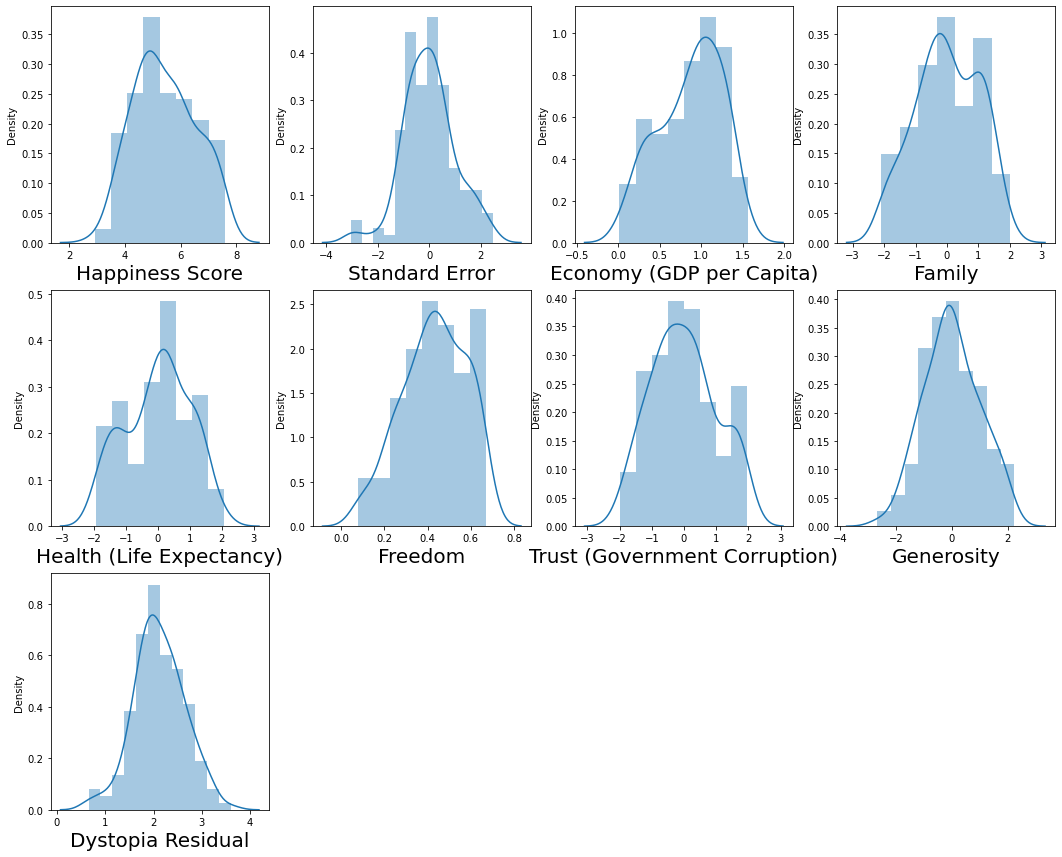

In [106]:
plt.figure(figsize=(18,20),facecolor = 'white')
plotnum = 1

for col in happscoredf:
    if plotnum <=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(happscoredf[col])
        plt.xlabel(col,fontsize=20)
    plotnum +=1
plt.show()

# Now it is look more normalized

# Regression Model

In [107]:
x = happscoredf.drop(columns = ['Happiness Score'])
y = happscoredf['Happiness Score']

In [108]:
x.shape

(149, 8)

In [109]:
y.shape

(149,)

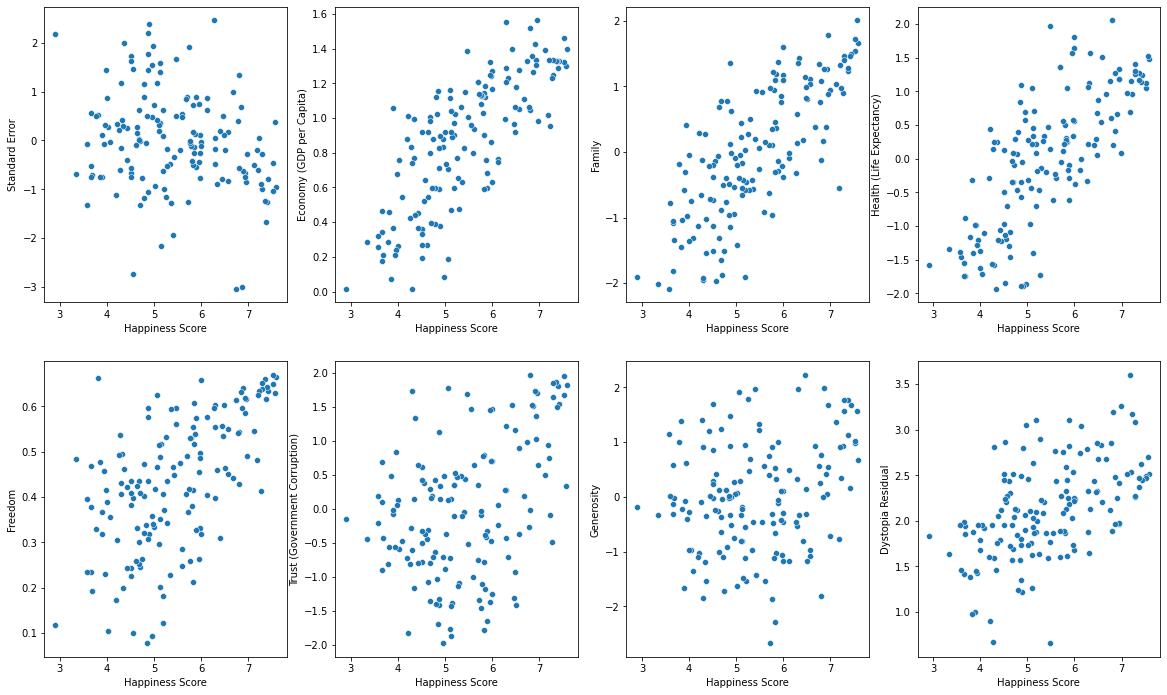

In [111]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnum = 1

for col in x:
    if plotnum <=9:
        ax = plt.subplot(4,4,plotnum)
        sns.scatterplot(y,x[col])        
    plotnum +=1
plt.show()

# Economy, Family and Health have the correlation with Happiness Score

In [112]:
# scaling the deature data

x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[-0.95033703,  1.38938721,  1.65888016, ...,  1.81767985,
         0.66643972,  0.7568764 ],
       [ 0.37856182,  1.14161348,  2.00912496, ...,  0.32614342,
         1.56291968,  1.10929978],
       [-1.04140135,  1.20253757,  1.73078528, ...,  1.95130762,
         0.98479181,  0.70850719],
       ...,
       [-1.32081011, -1.44292503, -2.08738878, ..., -0.20448847,
         1.14099647, -0.32213507],
       [-0.69272644, -1.53018115, -2.01044293, ..., -0.45069555,
        -0.32571122, -0.9307015 ],
       [ 2.17876604, -2.24398729, -1.90641014, ..., -0.1581135 ,
        -0.18156738, -0.54943602]])

In [113]:
# dividing data into test and train sets

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.31, random_state=1)

In [114]:
y_train.head()

41     6.130
37     6.298
120    4.514
143    3.845
122    4.507
Name: Happiness Score, dtype: float64

# Training the Models

In [116]:
lr = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor()
SV = SVR()

In [118]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)

SVR()

# All Models has been trained

# Linear Regression Model

In [119]:
y_lr_pred = lr.predict(x_test)

In [120]:
# R2 Score

r2_score(y_test,y_lr_pred)

0.9951741261647465

In [121]:
# mean squared error

mean_squared_error(y_test,y_lr_pred)

0.005006785765399615

# Support Vector Regression Model

In [122]:
y_svr_pred = SV.predict(x_test)

In [123]:
r2_score(y_test,y_svr_pred)

0.9790622001065686

In [124]:
# mean squared error

mean_squared_error(y_test,y_svr_pred)

0.02172271427806867

# Random Forest Regressor Model

In [125]:
y_rfg_pred = rf.predict(x_test)

In [126]:
r2_score(y_test,y_rfg_pred)

0.9547797502671332

In [127]:
# mean sqaured error

mean_squared_error(y_test,y_rfg_pred)

0.04691546244255328

# XGB Regressor Model

In [128]:
y_fgbr_pred = xg.predict(x_test)

In [129]:
r2_score(y_test,y_fgbr_pred)

0.9240053685165488

In [130]:
# mean squared error

mean_squared_error(y_test,y_fgbr_pred)

0.07884351148565634

# Cross Validation the Models

In [132]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [133]:
# Cross Validaing Linear Regression Model

cross_val_score(lr,x_scaled,y,cv=ShuffleSplit(5)).mean()

0.9930650742850367

In [135]:
# Cross Validating Support VEctor Reg. Model

cross_val_score(SV,x_scaled,y,cv = ShuffleSplit(5)).mean()

0.9435076484927245

In [136]:
# Cross Validating Random Forest Model

cross_val_score(rf,x_scaled,y,cv = ShuffleSplit(5)).mean()

0.9090651426749929

In [137]:
# Cross Validating XGB Regressor Model

cross_val_score(xg,x_scaled,y,cv = ShuffleSplit(5)).mean()

0.8183210378818044

after comparing the R2 and CV scores of the models, Linear Regression model is best pick.

In [139]:
print ('Best Model : Linear Regression Model', end = '\n')
print('Score =', lr.score(x_test,y_test)*100)

Best Model : Linear Regression Model
Score = 99.51741261647466


# Saving the Model

In [140]:
import joblib

In [141]:
joblib.dump(lr,'GoodOne.pkl')

['GoodOne.pkl']

In [142]:
mod = joblib.load("GoodOne.pkl")

In [143]:
print(mod.predict(x_test))

[3.59640253 4.96376768 5.83166636 5.17434585 5.13957219 4.76192603
 4.96942903 5.71137429 6.0605405  5.63292919 7.3860003  6.93638049
 4.92667195 7.12298728 5.71404079 6.26085093 5.21430895 6.47637808
 5.46859771 6.35899349 4.36492622 3.71485183 6.42815424 4.03155399
 4.5361564  6.77719562 5.7743236  5.78377845 4.99335065 4.72987447
 4.21601699 5.04341943 5.99017275 3.86691245 6.57354048 6.03471521
 4.64559888 4.50747352 7.00005293 4.4829885  3.7589046  5.46950404
 5.12612719 7.03047378 7.41683654 5.94894573 5.81259072]
